# TRP479 Spatial Data Science for Social Sciences : Assessment 1

230242300

notebook link: https://colab.research.google.com/drive/1-5nSaie26yPbwDOYDWf7UhMH4MTOGlmV

Word Count Script: https://colab.research.google.com/drive/1lQbJEh7hCKOYHhEnFt_dpiGIJ6rXPuyk

Word Count = 2,167


##Introduction and Context

This investigation aims to use the STATS19 road safety dataset to determine how casualty characteristics vary between the local authority districts of Sheffield, Barnsley, Rotherham and Doncaster (2016-2020). The report will describe the STATS19 dataset, defining a problem statement, generating initial data visualisations prior to examining differences between demographic factors, seasonality, road conditions, road type and spatial distribution. This investigation will present a series of simple visualisations explaining casualty characteristics at the local authority level.

### STATS19 Dataset

This dataset contains detailed road safety data regarding circumstances of personal injury road collisions in Great Britain, vehicles involved and the consequential casualties. The data relate only to incidents on public roads that are reported to and recorded by the police using the STATS19 collison reporting form.


### Problem Statement

* How do local authority districts differ in terms of casualty characteristics ?



##Data Description

This data analysis uses three datasets from the UK Government's Department of Transport STATS19 road safety data (2013). Each dataset has been subset and shows the following incident datasets for the local authority districts of Sheffield, Rotherham, Doncaster and Barnsley (Lovelace et al., 2019).

1. 'Crashes' - Notes the time, location and other key factors on each incident (weather, road features etc)

2. 'Vehicles' - Contains vehicle observations involved in crashes (type of vehicle, details about the driver etc)

3. 'Casualties'- contains observations of each person injured in traffic incidents (age and sex of the injured, whether they were in a vehicle or not, severity of the injury etc).

The following code cell uses the import statement to import the pandas, numpy, matplotlib.pyplot and seaborn libraries which will be used for data visualisation and analysis. Each library is assigned a corresponding alias eg, np, plt, sns.  

In [ ]:
# import relevant python libraries
from tabulate import tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Import is finished")

Import is finished


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# set number of displayable DataTables columns to 50 and pandas DataTable columns to unlimited, so the entire merged dataframe can be visually inspected.
from google.colab.data_table import DataTable
DataTable.max_columns = 50
pd.set_option('display.max_columns', None)

In [ ]:
# set aesthetic styles for graphs
sns.set_theme()

In [ ]:
# define the absolute filepath for the respective datasets that will be used within this analysis
fp_casualties = r'/content/drive/Shareddrives/TRP479_Spatial_Data_science_2024/Assessment_Data/casualties_sy_2016_2020_v2.csv'
fp_crashes = r'/content/drive/Shareddrives/TRP479_Spatial_Data_science_2024/Assessment_Data/crashes_sy_2016_2020_v2.csv'
fp_vehicles = r'/content/drive/Shareddrives/TRP479_Spatial_Data_science_2024/Assessment_Data/vehicles_sy_2016_2020_v2.csv'
fp_road_safety = r'/content/drive/Shareddrives/TRP479_Spatial_Data_science_2024/Assessment_Data/Road-Safety-Open-Dataset-Data-Guide.xlsx'

The following code cell uses pd.read_csv to assign each .csv dataset to a corresponding pandas object. The print statement indicates that the code cell has executed successfully.

In [ ]:
# load the various datasets and indicate successful loading
casualties = pd.read_csv(fp_casualties)
crashes = pd.read_csv(fp_crashes)
vehicles = pd.read_csv(fp_vehicles)
road_safety = pd.read_excel(fp_road_safety)
print("Datasets loaded successfully")

Datasets loaded successfully


The following code cell provides details of the geometry, shape, data types and  any na/null/ duplicated values. This is using a for loop which iterates over the crashes, casualties and vehicles DataFrames.

In [ ]:
#for each dataframe the .head(), .shape (rows and columns), .info(), .columns, is.na, .isnull and .duplicated methods provide a summary of the essential data parameters.
# create a dictionary to store a reference for each object (crashes, casualties and vehicles)
data_objects = {
    "crashes": crashes,
    "casualties": casualties,
    "vehicles": vehicles
}

# for loop to iterate over the three datasets, providing summaries of critical data properties
for name, data in data_objects.items():
  print(f"{'='*10} {name.upper()} {'='*10}")
  #show first 10 rows
  print(data.head())
  #print row count
  print("Row count: {}".format(data.shape[0]))
  #print column count
  print("Column count: {}".format(data.shape[1]))
  print(data.info())
  # print column headers
  print(data.columns)
  # check for nan values
  print(data[data.isna().any(axis=1)])
  # check for null values
  print(data.isnull().sum())
  # check for duplicated values
  print(data.duplicated().sum())
  print("\n")

# get dataframe dimensions
print("crashes shape:", crashes.shape)
print("casualties shape:", casualties.shape)
print("vehicles shape:", vehicles.shape)

========== CRASHES ==========
  accident_index  accident_year accident_reference  location_easting_osgr  \
0  2016140037390           2016          140037390               434419.0   
1  2016140037420           2016          140037420               434836.0   
2  2016140037421           2016          140037421               435427.0   
3  2016140037429           2016          140037429               428115.0   
4  2016140037456           2016          140037456               424196.0   

   location_northing_osgr  longitude   latitude     police_force  \
0                406264.0  -1.481959  53.551876  South Yorkshire   
1                383164.0  -1.478215  53.344219  South Yorkshire   
2                386946.0  -1.468916  53.378174  South Yorkshire   
3                405238.0  -1.577199  53.543028  South Yorkshire   
4                399643.0  -1.636769  53.492933  South Yorkshire   

  accident_severity  number_of_vehicles  number_of_casualties        date  \
0            Slight  

The previous for loop indicates that every DataFrame has a common variable 'accident_reference'.
It is also clear from the .shape() attribute that vehicles, crashes and casualties have different dimensions:

crashes shape: (12714, 39)

casualties shape: (17453, 19)

vehicles shape: (23879, 28)

## Data Preparation

In order to answer the problem statement, three DataFrames are combined so variables from each DataFrame (see previous code cell) may be analysed. In the following code cell, the .merge() function is used in order to combine the source data in the following ways

 vehicles_casualties = a DataFrame containing casualty information which is merged onto the vehicles DataFrame.

 vehicles_crashes = a DataFrame containing vehicles which were involved in incidents, with additional crash characteristics from the crashes DataFrame.

 crashes_casulties = a DataFrame containing casualty observations with additional crash characteristics added

The DataFrames are merged on 'accident_reference' because this is a common field. The default join method is 'inner', therefore the merged dataframe will contain observations containing the values in 'accident_reference' are present in both initial DataFrames.

In [ ]:
# merging dataframes prior to futher analysis
# vehicles to casualties
vehicles_casualties = vehicles.merge(casualties, on='accident_reference')
# vehicles to crashes
vehicles_crashes = vehicles.merge(crashes, on='accident_reference')
# crashes to casualties
crashes_casualties = crashes.merge(casualties, on ='accident_reference')
# casualties to crashes
casualties_crashes = casualties.merge(crashes, on = 'accident_reference')
# check that has worked (show first 8 rows)
casualties.head(8)
vehicles_casualties.head(8)
vehicles_crashes.head(8)
crashes_casualties.head(8)

# check dataframe size
print("Row count crashes: {}". format(crashes.shape[0]))
print("Row count casualties: {}". format(casualties.shape[0]))
print("Row count vehicles: {}". format(vehicles.shape[0]))

print("Row count vehicles_casualties: {}". format(vehicles_casualties.shape[0]))
print("Column count vehicles_casualties: {}". format(vehicles_casualties.shape[1]))

print("Row count vehicles_crashes: {}". format(vehicles_crashes.shape[0]))
print("Column count vehicles_crashes: {}". format(vehicles_crashes.shape[1]))

Row count crashes: 12714
Row count casualties: 17453
Row count vehicles: 23879
Row count vehicles_casualties: 34858
Column count vehicles_casualties: 46
Row count vehicles_crashes: 23881
Column count vehicles_crashes: 65


## Intial Data Exploration

### Crashes Dataset - Temporal Trends

Initially we are interested in examining temporal trends within the crashes DataFrame. The following graphs show crashes by day of the week, month of the year and by year (2016-2020). Each bar chart has been annotated using a for loop which iterates over each bar in the series in order to create insight into which days, months and years contain the highest number of incidents (crashes).

The graph below visualises all crashes in all local authority districts between 2016 and 2020. This plot utilised the .groupby() function to group crashes by week day. What is striking is the 17% increase in crashes from Monday (1799) to Friday (2105). The least number of crashes occurs on Saturday (1756) and Sunday (1400). Such a striking contrast might suggest that work related vehicle incidents may have an effect within this dataset.

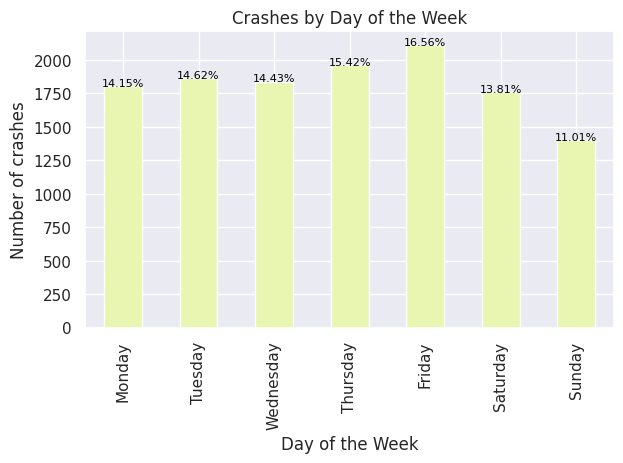

+-----------------+-------------+---------------------------------+
| Day of the Week | Crash Count | Percentage of Total Crashes (%) |
+-----------------+-------------+---------------------------------+
|     Friday      |    2105     |              16.6               |
|    Thursday     |    1960     |              15.4               |
|     Tuesday     |    1859     |              14.6               |
|    Wednesday    |    1835     |              14.4               |
|     Monday      |    1799     |              14.1               |
|    Saturday     |    1756     |              13.8               |
|     Sunday      |    1400     |              11.0               |
+-----------------+-------------+---------------------------------+


In [ ]:
# intial data exploration
# plot crashes by day of the week, in chronological order
sns.set_palette("YlGnBu")
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
crash_day = crashes.groupby('day_of_week').size()
ax = crash_day.loc[day_order].plot(kind='bar')
plt.title('Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of crashes')
plt.tight_layout()
# add percentage labels to bars using iterative loop
totals = []
for i in ax.patches:
  totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
  ax.text(i.get_x() + i.get_width()/2, i.get_height()+1, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=8,
            color='black', ha='center')
plt.show()

#tabulate crash count by day of week
crash_day = crashes.groupby('day_of_week').size().reset_index(name='Crash Count')
crash_day_sorted = crash_day.sort_values(by='Crash Count', ascending=False)
total_crashes = crash_day_sorted['Crash Count'].sum()
crash_day_sorted['Percentage'] = round((crash_day_sorted['Crash Count'] / total_crashes) * 100, 1)
data = crash_day_sorted.values.tolist()
headers = ["Day of the Week", "Crash Count", "Percentage of Total Crashes (%)"]
table = tabulate(data, headers=headers, tablefmt="pretty")
print(table)

The temporal trend below is less defined than in the previous graph. It is clear there is a 33.2% decrease between the month with the highest number of crashes, November (1,175) and April which sees the fewest crashes (882). It's possible that weather and/or road conditions will have an impact on the number of collisions, because traffic incidents are more likely to occur in icy or wet road conditions (Malin, Norros and Innamaa, 2019).

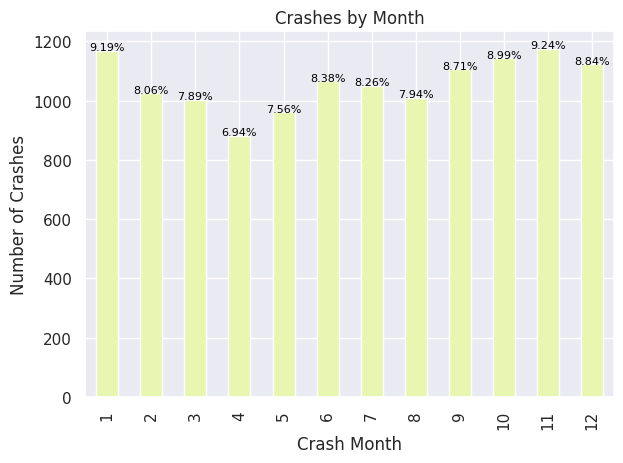

+-------------------+-------------+---------------------------------+
| Month of the Year | Crash Count | Percentage of Total Crashes (%) |
+-------------------+-------------+---------------------------------+
|       11.0        |   1175.0    |              9.24               |
|        1.0        |   1169.0    |              9.19               |
|       10.0        |   1143.0    |              8.99               |
|       12.0        |   1124.0    |              8.84               |
|        9.0        |   1107.0    |              8.71               |
|        6.0        |   1065.0    |              8.38               |
|        7.0        |   1050.0    |              8.26               |
|        2.0        |   1025.0    |              8.06               |
|        8.0        |   1010.0    |              7.94               |
|        3.0        |   1003.0    |              7.89               |
|        5.0        |    961.0    |              7.56               |
|        4.0        

In [ ]:
# plot crashes by month in chronological order
sns.set_palette("YlGnBu")
crashes['datetime'] = pd.to_datetime(crashes['datetime'])
crashes['crash_month'] = crashes['datetime'].dt.month
crashes['crash_month'].head(10)

crash_month = crashes.groupby('crash_month').size()
ax = crash_month.plot(kind='bar')
plt.title('Crashes by Month')
plt.xlabel('Crash Month')
plt.ylabel('Number of Crashes')
plt.tight_layout()
# annotate bars with percentages using iterative loop
totals = []
for i in ax.patches:
  totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
  ax.text(i.get_x() + i.get_width()/2, i.get_height()+1, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=8,
            color='black', ha='center')
plt.show()

#tabulate crash count by month
crash_month = crashes.groupby('crash_month').size().reset_index(name='Crash Count')
crash_month_sorted = crash_month.sort_values(by='Crash Count', ascending=False)
total_crashes = crash_month_sorted['Crash Count'].sum()
crash_month_sorted['Percentage'] = round((crash_month_sorted['Crash Count'] / total_crashes) * 100, 2)
data = crash_month_sorted.values.tolist()
headers = ["Month of the Year", "Crash Count", "Percentage of Total Crashes (%)"]
table = tabulate(data, headers=headers, tablefmt="pretty")
print(table)

We observe a consistent downwards trend in the number of crashes per year (2016-2020). There were 3,053 crashes in 2016 and 2,794 in 2017. 2018 saw 2,469, 2,377 in 2019 and 2,021 in the year 2020. This is a striking decrease of 33.8% in 4 years. The effect of COVID-19 is likely to be a contributing factor in the trend (Gualtieri et al., 2020), although the downwards trend between 2016-2019 remains unexplained.

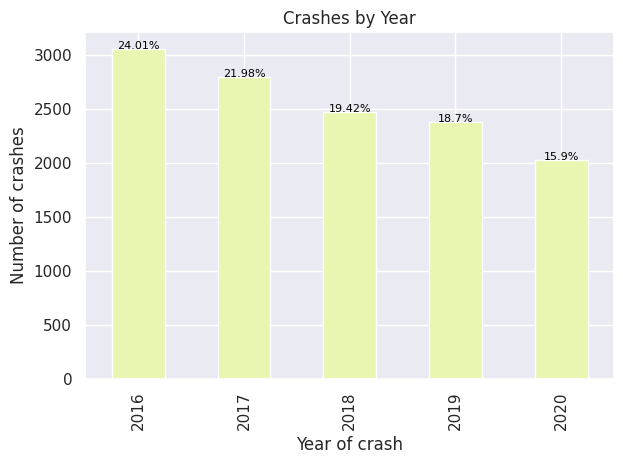

+------------+-------------+---------------------------------+
| Crash Year | Crash Count | Percentage of Total Crashes (%) |
+------------+-------------+---------------------------------+
|   2016.0   |   3053.0    |              24.0               |
|   2017.0   |   2794.0    |              22.0               |
|   2018.0   |   2469.0    |              19.4               |
|   2019.0   |   2377.0    |              18.7               |
|   2020.0   |   2021.0    |              15.9               |
+------------+-------------+---------------------------------+


In [ ]:
# plot crashes by year in chronological order
sns.set_palette("YlGnBu")
crash_year = crashes.groupby('accident_year').size()
ax = crash_year.plot(kind='bar')
plt.title('Crashes by Year')
plt.xlabel('Year of crash')
plt.ylabel('Number of crashes')
plt.tight_layout()
#annotate with iterative loop
totals = []
for i in ax.patches:
  totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
  ax.text(i.get_x() + i.get_width()/2, i.get_height()+1, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=8,
            color='black', ha='center')
plt.show()

#tabulate crash count by year
crash_year = crashes.groupby('accident_year').size().reset_index(name='Crash Count')
crash_year_sorted = crash_year.sort_values(by='Crash Count', ascending=False)
total_crashes = crash_year_sorted['Crash Count'].sum()
crash_year_sorted['Percentage'] = round((crash_year_sorted['Crash Count'] / total_crashes) * 100, 1)
data = crash_year_sorted.values.tolist()
headers = ["Crash Year", "Crash Count", "Percentage of Total Crashes (%)"]
table = tabulate(data, headers=headers, tablefmt="pretty")
print(table)

One useful variable within the casualties DataFrame 'age_band_of_casualty' tells us the age band of the casualties occurring due to traffic accidents. This is a highly significant insight because it tells us which age demographics is most commonly victim of traffic incidents.

Index(['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'acc_unique'],
      dtype='object')


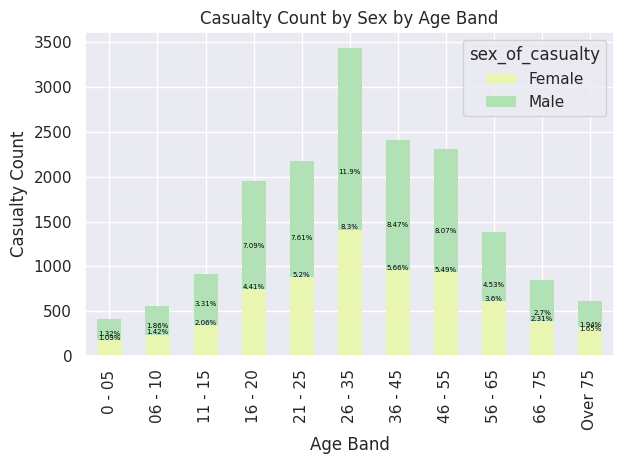

+----------------------+-----------------+-------------+---------------------------------+
| Age Band of Casualty | Sex of Casualty | Crash Count | Percentage of Total Crashes (%) |
+----------------------+-----------------+-------------+---------------------------------+
|       26 - 35        |      Male       |    2024     |              11.9               |
|       36 - 45        |      Male       |    1440     |               8.5               |
|       26 - 35        |     Female      |    1411     |               8.3               |
|       46 - 55        |      Male       |    1373     |               8.1               |
|       21 - 25        |      Male       |    1294     |               7.6               |
|       16 - 20        |      Male       |    1205     |               7.1               |
|       36 - 45        |     Female      |     963     |               5.7               |
|       46 - 55        |     Female      |     933     |               5.5               |

In [ ]:
# what columns do we have within casualties ?
print(casualties.columns)
# Distribution of casualties based on age
# rename age bands 6 - 10 and 0 - 5 to allow chronological plotting
casualties['age_band_of_casualty'] = casualties['age_band_of_casualty'].replace('6 - 10', '06 - 10')
casualties['age_band_of_casualty'] = casualties['age_band_of_casualty'].replace('0 - 5', '0 - 05')
# remove observation from age band of casualty and sex of casualty that have a value of 'Data missing or out of range'
casualties_filtered = casualties[casualties['age_band_of_casualty'] != 'Data missing or out of range']
casualties_filtered = casualties_filtered[casualties_filtered['sex_of_casualty'] != 'Data missing or out of range']
# group observations by age band and sex
casulty_age = casualties_filtered.groupby(['age_band_of_casualty', 'sex_of_casualty']).size().unstack()
ax = casulty_age.plot(kind='bar', stacked=True, edgecolor='none')
plt.title('Casualty Count by Sex by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Casualty Count')
plt.tight_layout()
# iterative loop to label bars
totals = []
for i in ax.patches:
  totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
  ax.text(i.get_x() + i.get_width()/2, i.get_height()+1, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=5,
            color='black', ha='center')
plt.show()

#tabulate casaulty count by sex and age band
casualty_age_sex  = casualties_filtered.groupby(['age_band_of_casualty','sex_of_casualty']).size().reset_index(name='Crash Count')
casulty_age_sex_sorted = casualty_age_sex.sort_values(by='Crash Count', ascending=False)
total_age = casulty_age_sex_sorted['Crash Count'].sum()
casulty_age_sex_sorted['Percentage'] = round((casulty_age_sex_sorted['Crash Count'] / total_age) * 100, 1)
data = casulty_age_sex_sorted.values.tolist()
headers = ["Age Band of Casualty", "Sex of Casualty", "Crash Count", "Percentage of Total Crashes (%)"]
table = tabulate(data, headers=headers, tablefmt="pretty")
print(table)

The modal class within the STATS19 dataset are 26-35-year olds (11.9% total casualties). Within this age band 2024 casualties were male (58.9%) and 1411 were female (41.1%), totalling 3,435 26-35-year old casualties between 2016 and 2020. Although the modal class was 26-35-year olds, Males aged 26-35 and 36-45 were more common casualties in traffic incidents than any other age-sex group within the study. Very young (0-5) young (6-10) adolescent (11-15) and old (75+) age groups are the least common casualty age group observed with a combined contribution of 11.4% of total casualties from 0-5 (males and females), 6-10 (males and females), 11-15 (females), over 75 (males and females).  

## Data Analysis

As mentioned above, this analysis is interested in determining spatial variation in casualty severity across four Local Authority Districts. One means of interrogating this dataset further is to use the .groupby() function on the objects 'local_authority_district', 'age_band_of_casualty', 'casualty_severity'. The following series demonstrates spatial variation between local authority, in terms of the frequeny distribution of age bands as well as the casualty severity. In the following code cell .groupby(), .unstack() and axs.flatten() were used.

Index(['accident_index_x', 'accident_year_x', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'datetime',
       'acc_unique_x', 'accident_index_y', 'accident_year_y',
       'vehicle_ref

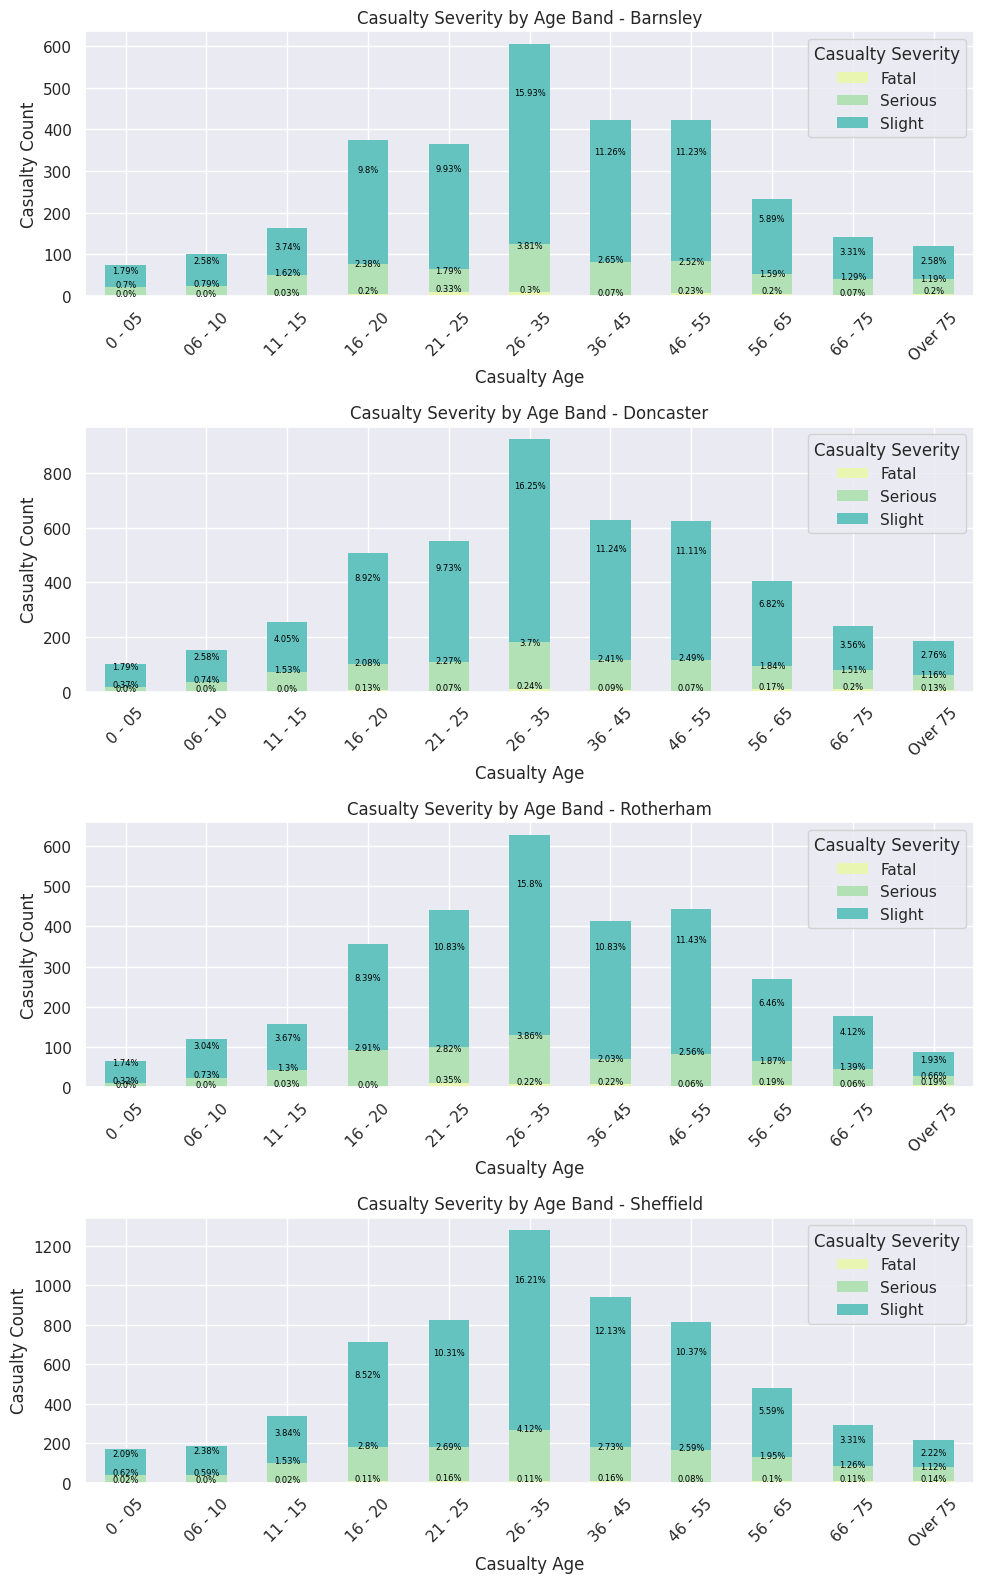

In [ ]:
# plot casualty age band with severity by local authority
print(crashes_casualties.columns)
sns.set_palette("YlGnBu")
crashes_casualties['age_band_of_casualty'] = crashes_casualties['age_band_of_casualty'].replace('6 - 10', '06 - 10')
crashes_casualties['age_band_of_casualty'] = crashes_casualties['age_band_of_casualty'].replace('0 - 5', '0 - 05')
# filter out rows where the age band is 'Data missing or out of range'
crashes_casualties_filtered = crashes_casualties[crashes_casualties['age_band_of_casualty'] != 'Data missing or out of range']

# group by 'local_authority_district','age_band_of_casualty','casualty_severity'
# use unstack() to reshape the dataframe to wide format
severity_count = crashes_casualties_filtered.groupby(['local_authority_district','age_band_of_casualty','casualty_severity']).size().unstack()
# get local authority district names
la_districts = severity_count.index.get_level_values('local_authority_district').unique()

# create subplots
fig, axs = plt.subplots(len(la_districts), 1, figsize=(10, len(la_districts)*4))

# flatten axis array to iterate more easily
axs = axs.flatten()

# for loop to iterate over each local authority
for i, district in enumerate(la_districts):
  ax = axs[i]
  la_districts_data = severity_count.loc[district]
  la_districts_data.plot(kind='bar', stacked=True, ax=ax, edgecolor='none')
  ax.set_title(f'Casualty Severity by Age Band - {district}')
  ax.set_xlabel('Casualty Age')
  ax.set_ylabel('Casualty Count')
  ax.legend(title='Casualty Severity')
  ax.set_xticklabels(la_districts_data.index, rotation=45)

  # add labels to each bar
  totals = []
  for p in ax.patches:
    totals.append(p.get_height())
  total = sum(totals)
  for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height()+1, f"{round((p.get_height()/total)*100, 2)}%", fontsize=6, color='black', ha='center')

# Adjust layout
plt.tight_layout()
plt.show()




In [ ]:
# tabulate age band by casualty severity by local authority
tables_data = []
age_sex = crashes_casualties_filtered.groupby(['local_authority_district','age_band_of_casualty','sex_of_casualty']).size().unstack()
# loop to produce single table for each local authority district
for district in la_districts:
  district_data = age_sex.loc[district]
  total_casualties = district_data.sum().sum()
  district_data['Total'] = district_data.sum(axis=1)
  district_data['Percentage'] = (district_data['Total'] / total_casualties) * 100
  data = district_data.reset_index().values.tolist()
  headers = ['Age Band'] + ['Age Band - Source','Female','Male','Total','Percentage of Total (%)',]
  tables_data.append((district, tabulate(data, headers=headers, tablefmt="grid")))
# loop to produce table title for each
for district, table in tables_data:
  print (f"Local Authority District: {district}")
  print(table)
  print("\n")


Local Authority District: Barnsley
+------------+---------------------+----------+--------+---------+---------------------------+
| Age Band   |   Age Band - Source |   Female |   Male |   Total |   Percentage of Total (%) |
+============+=====================+==========+========+=========+===========================+
| 0 - 05     |                 nan |       28 |     47 |      75 |                   2.48344 |
+------------+---------------------+----------+--------+---------+---------------------------+
| 06 - 10    |                 nan |       44 |     58 |     102 |                   3.37748 |
+------------+---------------------+----------+--------+---------+---------------------------+
| 11 - 15    |                 nan |       50 |    113 |     163 |                   5.39735 |
+------------+---------------------+----------+--------+---------+---------------------------+
| 16 - 20    |                 nan |      129 |    245 |     374 |                  12.3841  |
+------------+-

There are several striking observations here. Firstly, all four local authority districts exhibit a gaussian frequency distribution of casualties. Care should be taken to acknowledge the differing y axis scale, especially in the case of Sheffield, which contains 1279 casualties in its modal class (26-35-year olds). The tabulated values above show that the most common casualty type for recorded casualties was a 26-35-year old Male from Sheffield, which accounts for 12.43% of recorded casualties in Sheffield (778), a mean of 155.6 casualties per year (2016-2020). In the remaining local authorities, the most common casualty classes were:


Doncaster: Male, age 26 - 35 (11.89%)

Barnsley: Male, age 26 - 35 (11.65%)

Rotherham: Male, age 26 - 35 (11.07%)

It is also clear that Sheffield sees the most casualties within the dataset (6256) with Doncaster second (4573) Rotherham third (3159) and Barnsley (3020)

(Yu and Abdel-Aty, 2014) found that real-time traffic and weather variables have substantial influence in crash injury severity. Casualty observations are grouped for each local authority district, based on the season and casualty severity. Below, an if elif statement is used to parse the month attribute, because 'datetime' is converted to datetime format. The seasons are defined as follows:

Spring = March - May

Summer = June - August

Autumn = September - November

Winter = December - February

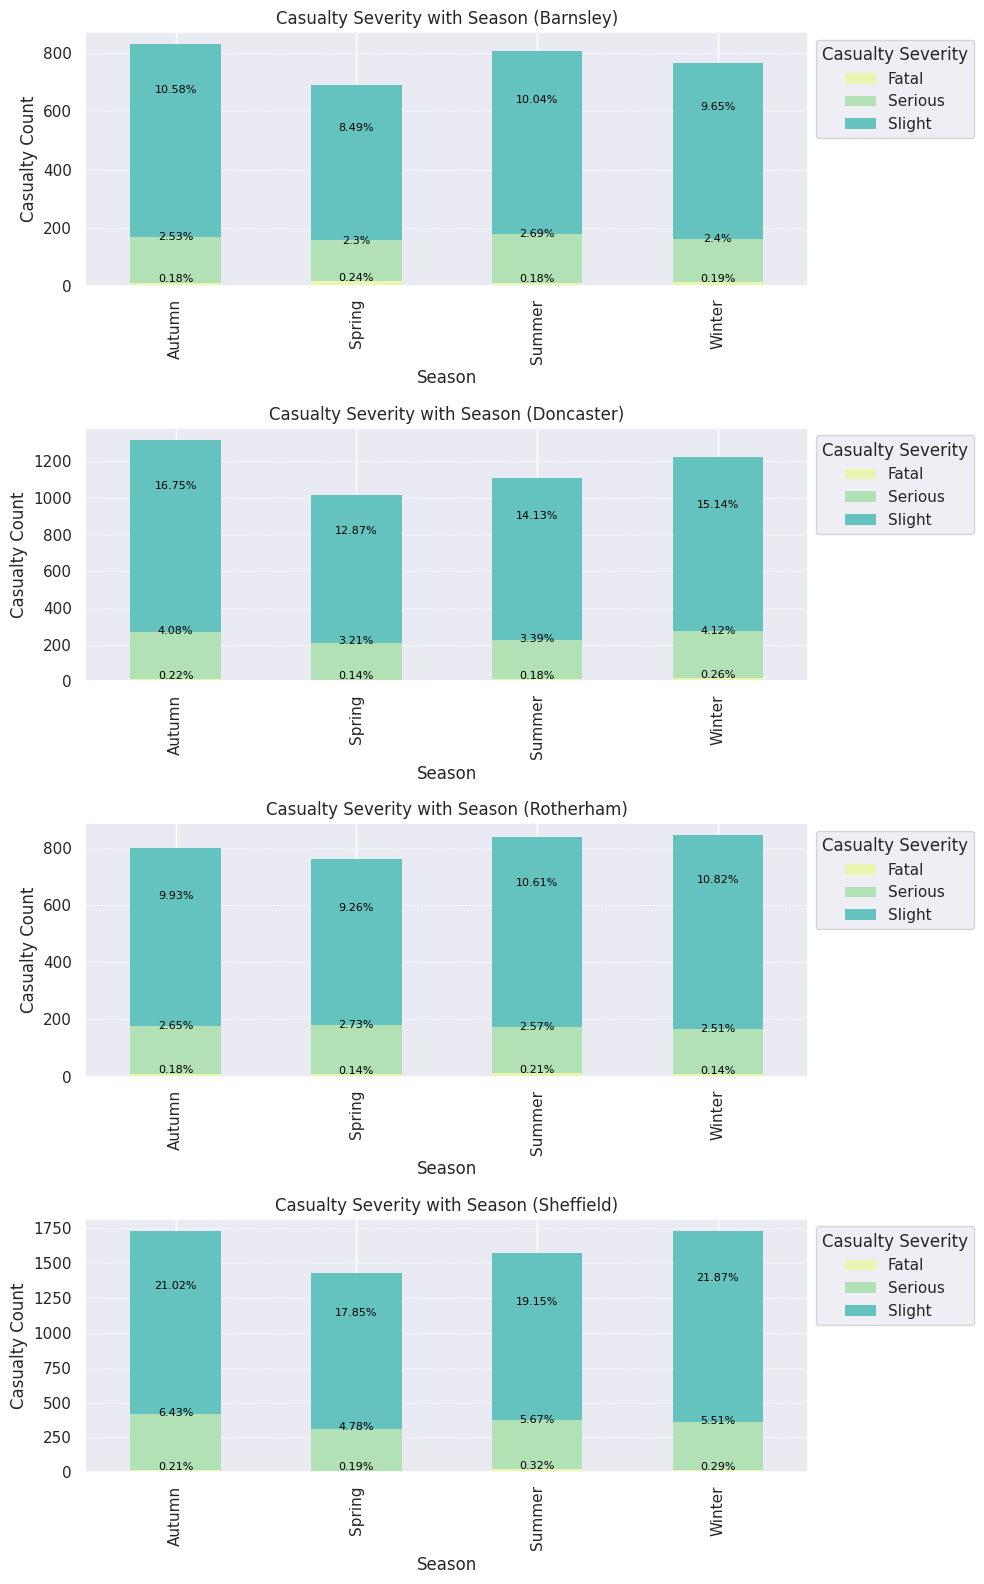

In [ ]:
# casualty severity by season
# what effect does the season have on accident/casualty severity between 2016 and 2020 ?

# convert to datetime
crashes_casualties['datetime'] = pd.to_datetime(crashes_casualties['datetime'])

# slice months based on season
def get_season(month):
  if 3 <= month <= 5:
    return 'Spring'
  elif 6 <= month <= 8:
    return 'Summer'
  elif 9 <= month <= 11:
    return 'Autumn'
  else:
    return 'Winter'

crashes_casualties['season'] = crashes_casualties['datetime'].dt.month.apply(get_season)
# grouping local authority, accident severity and newly created 'season' column
count = crashes_casualties.groupby(['local_authority_district', 'season','casualty_severity']).size().unstack(fill_value=0)
# get la value
la_districts = count.index.get_level_values('local_authority_district').unique()
# subplots
fig, axs = plt.subplots(len(la_districts), 1, figsize=(10, len(la_districts)*4))
# iterate over unique la value to produce plot
for i, district in enumerate(la_districts):
  ax = axs[i]
  district_data = count.loc[district]
  district_data.plot(kind='bar', stacked=True, ax=ax, edgecolor = 'none')
  ax.set_title(f'Casualty Severity with Season ({district})')
  ax.set_xlabel('Season')
  ax.set_ylabel('Casualty Count')
  ax.legend(title = 'Casualty Severity', loc='upper left', bbox_to_anchor=(1,1))
# add labels to each bar
  total = []
  for p in ax.patches:
    total.append(p.get_height())
  total = sum(totals)
  for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height()+1, f"{round((p.get_height()/total)*100, 2)}%", fontsize = 8, color='black', ha='center')
  # modify grid position
  ax.grid(True, axis='y', which='both', linestyle='--', linewidth=0.5)
  ax.set_axisbelow(True)
# layout options
plt.tight_layout()
plt.show()



Spring and Summer months typically contain the lowest casualty counts across all 4 local authority districts. It appears that summer months contain a larger number of crashes than spring months (Sheffield 19.15% vs 17.85%), (Rotherham 10.61% vs 9.26%), (Doncaster 14.13% vs 12.87%), (Barnsley 10.04% vs 8.49%). There is no indication that winter months, characterised by more rainfall, cooler temperatures and presence of snow and ice on the road increase casualty severity. Let's confirm this statement by examining fatality rates by road conditions.

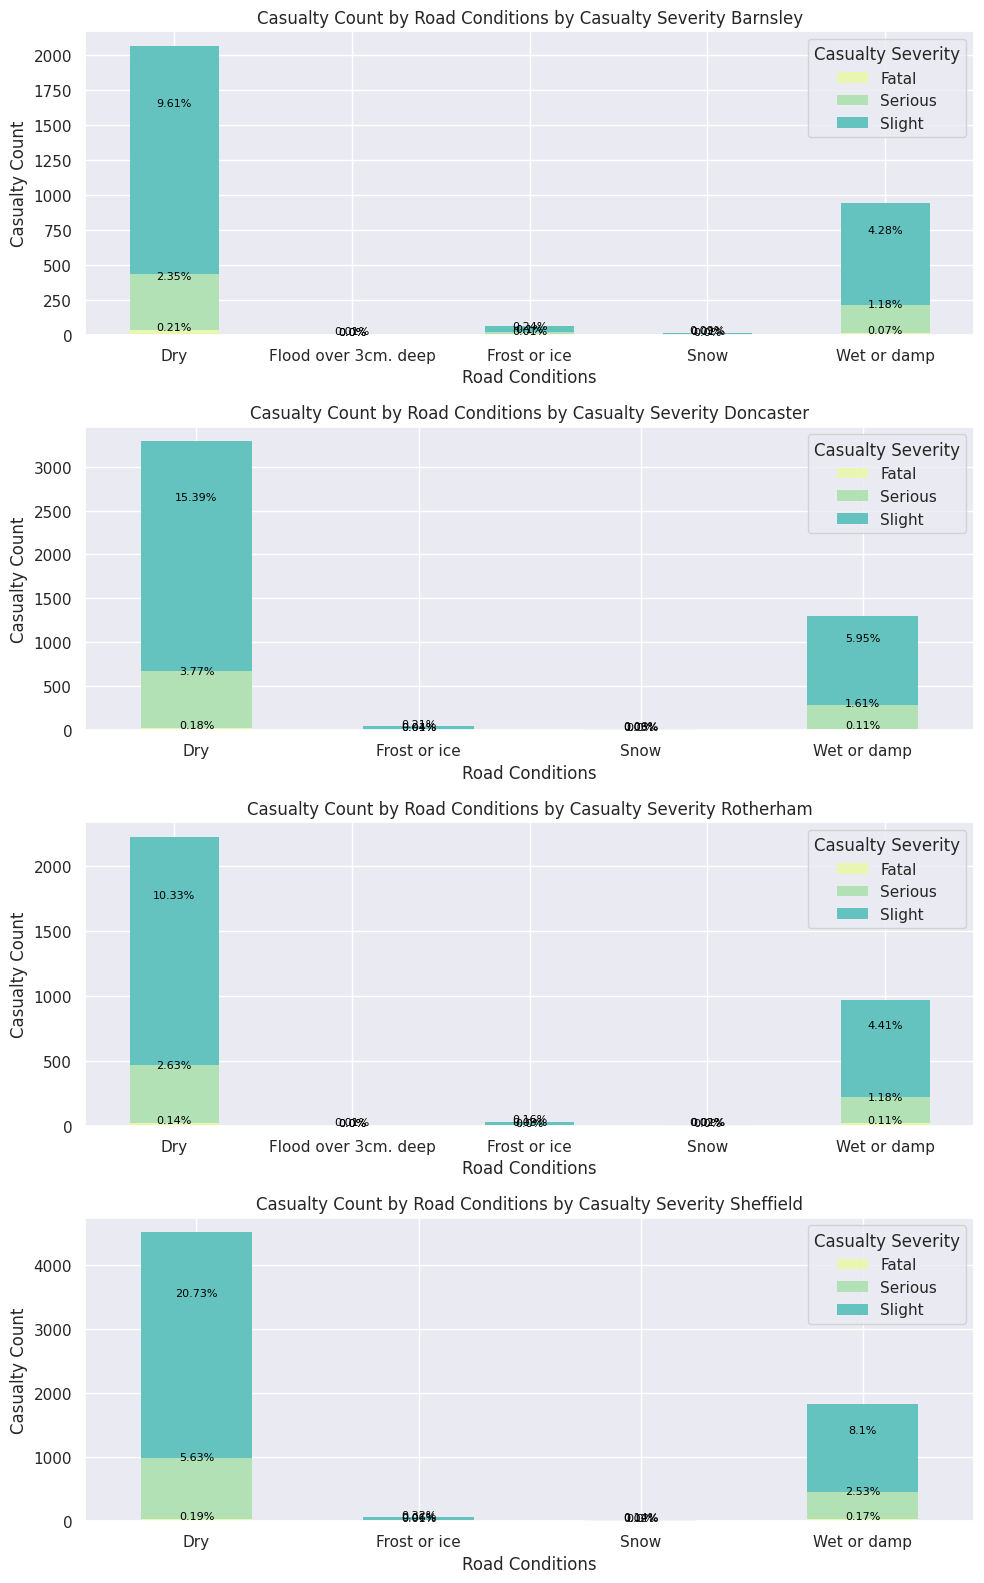

In [ ]:
# casulties based on road conditions
# filter to remove out of range values
crashes_casualties_filtered = crashes_casualties[crashes_casualties['road_surface_conditions'] != 'Data missing or out of range']
# group by age band and accident severity
la_severity_road = crashes_casualties_filtered.groupby(['local_authority_district','road_surface_conditions','casualty_severity']).size().unstack()
# sort columns based on sum - descending order
la_severity_road = la_severity_road[la_severity_road.sum().sort_values(ascending=True).index]
# get local authority district names
la_districts = la_severity_road.index.get_level_values('local_authority_district').unique()
# create subplots
fig, axs = plt.subplots(len(la_districts), 1, figsize=(10, len(la_districts)*4))
# flatten axis array
axs = axs.flatten()
# for loop to iterate over each local authority
for i, district in enumerate(la_districts):
  ax = axs[i]
  la_districts_data = la_severity_road.loc[district]
  la_districts_data.plot(kind='bar', stacked=True, ax=ax, edgecolor='none')
  ax.set_title(f'Casualty Count by Road Conditions by Casualty Severity {district}')
  ax.set_xlabel('Road Conditions')
  ax.set_ylabel('Casualty Count')
  ax.legend(title='Casualty Severity')
  ax.set_xticklabels(la_districts_data.index, rotation=0)
# add labels to each bar
  total = []
  for p in ax.patches:
    total.append(p.get_height())
  total = sum(totals)
  for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height()+1, f"{round((p.get_height()/total)*100, 2)}%", fontsize = 8, color='black', ha='center')
# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# subset to include only dry road observations
dry_road = crashes_casualties[crashes_casualties['road_surface_conditions'] == 'Dry']
# here is the total number of observed dry road casualties
total_dry_road_casualties = len(dry_road)
total_casualties = len(crashes_casualties)
percentage_dry_road = (total_dry_road_casualties/total_casualties) * 100
print(f"percentage of dry road casualties = ", percentage_dry_road)

percentage of dry road casualties =  69.32684044686336


The overwhelming majority (69.33%) of casualties are associated with dry road conditions, with an additional 28.5% of casualties associated with wet or damp road conditions. The contribution of fatal casualties in wet or damp conditions is 0.46%, while the contribution of fatal casualties in dry conditions is marginally greater at 0.51%.

Let's examine casualty severity, road type and local authority district by using the .groupby() function. We can observe six unique road types within the crashes_casualties DataFrame (see print()...). Single carriageway roads account for most casualties, with dual carriageway roads accounting for the second most common source of casualties. Doncaster has the highest proportion of casualties from dual carriageways (20.3%) of all local authorities. It would be relevant to examine the proportion of road types within each local authority to determine if any local authorities have a disproportionate number of accidents on either road type in further analysis.


['One way street' 'Single carriageway' 'Dual carriageway' 'Roundabout'
 'Slip road' 'Unknown']


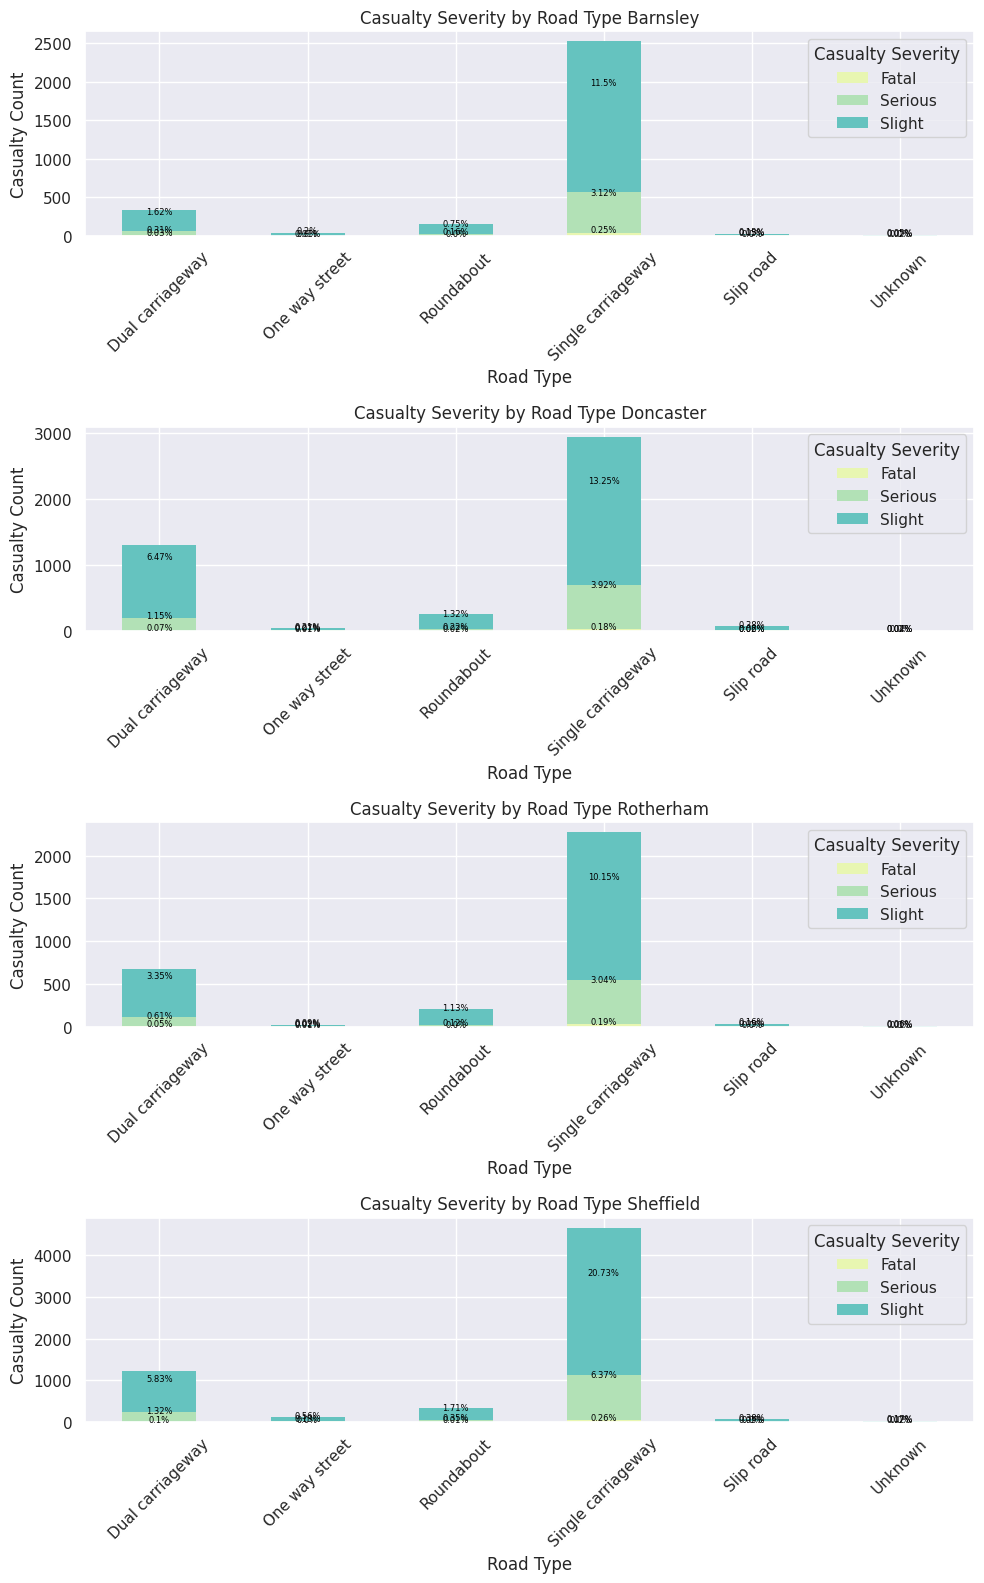

In [ ]:
print(crashes_casualties['road_type'].unique())
# casualties based on road type
sns.set_palette("YlGnBu")
# group by age band and accident severity
la_severity_road = crashes_casualties.groupby(['local_authority_district','road_type','casualty_severity']).size().unstack()
# sort columns based on sum - descending order
la_severity_road = la_severity_road[la_severity_road.sum().sort_values(ascending=True).index]
# get local authority district names
la_districts = la_severity_road.index.get_level_values('local_authority_district').unique()
# create subplots
fig, axs = plt.subplots(len(la_districts), 1, figsize=(10, len(la_districts)*4))
# flatten axis array
axs = axs.flatten()
# for loop to iterate over each local authority
for i, district in enumerate(la_districts):
  ax = axs[i]
  la_districts_data = la_severity_road.loc[district]
  la_districts_data.plot(kind='bar', stacked=True, ax=ax, edgecolor='none')
  ax.set_title(f'Casualty Severity by Road Type {district}')
  ax.set_xlabel('Road Type')
  ax.set_ylabel('Casualty Count')
  ax.legend(title='Casualty Severity')
  ax.set_xticklabels(la_districts_data.index, rotation=45)
# for loop to annotate bars with percentage labels
  total = []
  for p in ax.patches:
    total.append(p.get_height())
  total = sum(totals)
  for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height()+1, f"{round((p.get_height()/total)*100, 2)}%", fontsize = 6, color='black', ha='center')
# Adjust layout
plt.tight_layout()
plt.show()

### Spatial Variation in Casualty Characteristics

So far, high spatial resolution trends haven't been considered. the print(casualties_crashes.columns) identifies longitude and latitude fields which will be used to demonstrate casualty incidence at a finer spatial resolution. This is achieved using the seaborn 'scatterplot' function using the Latitude field (Y axis) and Longitude field (X axis). The first subplot indicates casualties by local authority. Alpha = 0.05 increases dot transparency to visualise a large amount of point data in one plot(n=17455). Subplot 2 visualises casualty location with a fill of casualty severity, similarly, a low alpha value is particularly useful here so that unique casualty severity classes are not obscured by casualty observation plotted above. There is a trend of linear clustering around single and dual carriageway roads, which were observed to have the highest casualty rates. A satellite basemap would confirm this, however this was omitted because it may obscure the clustering 'signal'(especially when alpha = 0.1). Plotting spatial information via a scatterplot means that no coordinate reference system exists, therefore the data visualisation may appear 'distorted'.  

17455


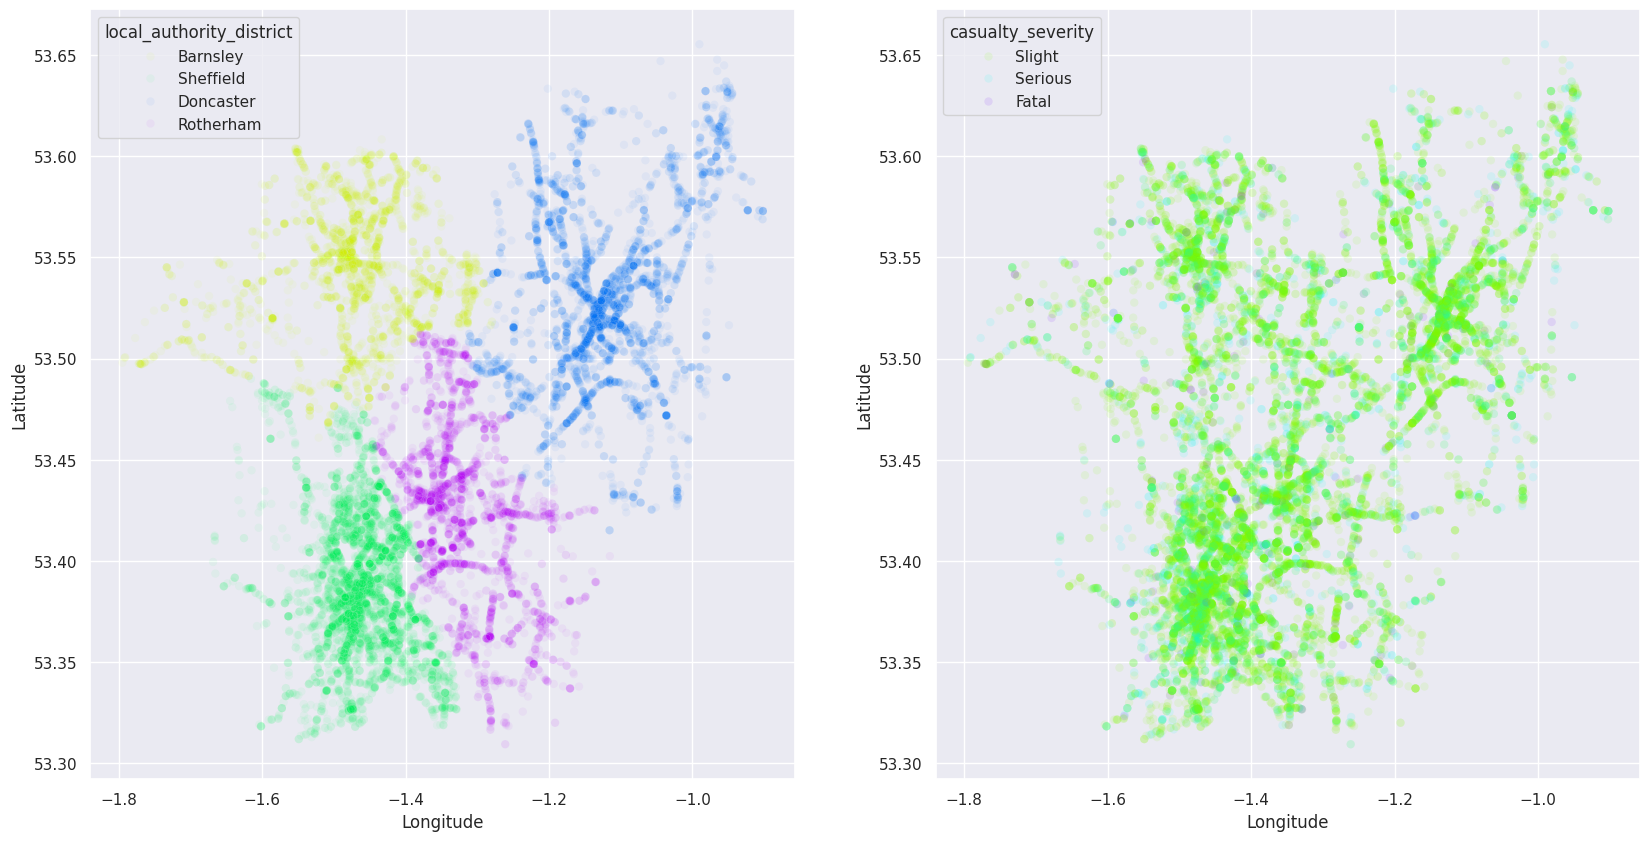

In [ ]:
print(len(casualties_crashes))
# plot casualties by local authority
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.scatterplot(data=casualties_crashes, x= "longitude", y = "latitude", hue = "local_authority_district", alpha = 0.05, palette="hsv")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# plot casualty by casualty severity
plt.subplot(1,2,2)
sns.scatterplot(data=casualties_crashes, x= "longitude", y = "latitude", hue = "casualty_severity", palette="hsv", edgecolor="none", alpha = 0.1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Visualising traffic collisions by casualty count gives an indication of the 'magnitude' of each collision. Minibuses typically involve a greater number of casualties, because the carrying capacity is greater, similarly mobility scooters, bicycles and motorcycles (all types) involve the fewest casualties (Broughton, 2008). The visualisation below indicates the spatial distribution of crashes with a fill of 'number_of_casualties'. The effect is that colour represents the 'magnitude' of the incident. The spatial distribution of small (≤3 person) collisions appears uniform, however the distribution of large (6≤ person) collisions appears to cluster around linear road features, perhaps large single carriagway 'A' and 'B' road types.  

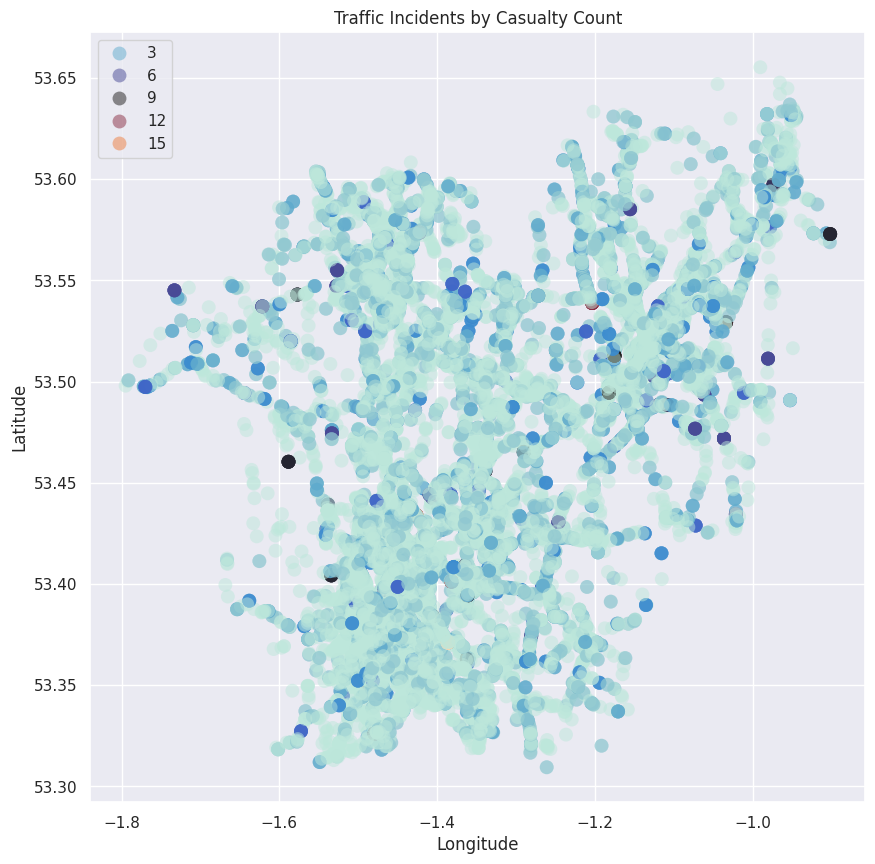

In [ ]:
# map of crashes by casualty number
plt.figure(figsize=(10, 10))
sns.scatterplot(data=casualties_crashes, x="longitude", y="latitude", hue="number_of_casualties", palette="icefire", s=100, alpha=0.5, edgecolor="none")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Incidents by Casualty Count')
plt.legend()
plt.show()

## Discussion

This STATS19 dataset analysis observed a prevalence of young (26–35-year-old) male casualties in traffic collisions. On average 0.054% of casualties in each local authority were fatal accidents involving males (26-35). It was also observed that the modal age - sex class within the DataFrame was males between 26-35. This is consistent with (Gray, Quddus and Evans, 2008) who report a similar prevalence, 14 % of fatal accidents between 1991-2003 involved young males, despite holding only 8% of all drivers’ licenses.
The overwhelming majority of casualties within the data occurred on single carriageway roads compared with all other road types. (Gray, Quddus and Evans, 2008) also find that driving on single carriageway roads predicted occurrence of serious and fatal injuries. Further analysis is required to determine whether there is a reliable effect here, or whether it is a result of most roads being single carriageway.
With regards to seasonality, (Farmer and Williams, 2005), an American study found that summer and autumn months experience more crash deaths than spring and winter months. Similarly, we observe autumn and summer months experiencing greater volume of casualties, although the rate of fatal accidents remains inconclusive. (Farmer and Williams, 2005) attribute such a trend to increased vehicle traffic (July 4th and January 1st), however the extent to which this hypothesis is applicable within this UK analysis is unclear.


## Conclusion

This analysis has utilised three datasets within the STATS19 road safety dataset. Each of the three datasets 'crashes', 'casualties' and 'vehicles' contains observations from road traffic incidents between 2016-2020. 26–35-year-olds males were the most common casualties of traffic collisions, and that traffic collisions most commonly occur on single carriageway road types. Several spatial and temporal patterns were observed, specifically that a greater number of collisions occur on Friday (16.56%), crashes more commonly occur during the summer and fall months, a trend which has previously been acknowledged in the literature (Farmer and Williams, 2005). There is a 33.8% decrease in total crashes between 2016-2020. It is hypothesised that such a trend may be a result of the COVID-19 lockdown and furlough scheme (Yasin, Grivna and Abu-Zidan, 2021), although this hypothesis remains untested. A spatial component is observed in relation to large (6≤ person) collisions, which appear to be clustered along larger dual carriageway and 'A' roads. Vehicle type should be considered in further analysis to confirm if larger vehicle types may contribute to this trend.

## Reference List

* Broughton, J. (2008). Car driver casualty rates in Great Britain by type of car. Accident Analysis & Prevention, 40(4), pp.1543–1552. doi:https://doi.org/10.1016/j.aap.2008.04.002.

* Department for Transport (2013). Road accidents and safety statistics. [online] GOV.UK. Available at: https://www.gov.uk/government/collections/road-accidents-and-safety-statistics.

* Farmer, C.M. and Williams, A.F. (2005). Temporal factors in motor vehicle crash deaths. Injury Prevention, 11(1), pp.18–23. doi:https://doi.org/10.1136/ip.2004.005439.

* Gray, R.C., Quddus, M.A. and Evans, A. (2008). Injury severity analysis of accidents involving young male drivers in Great Britain. Journal of Safety Research, 39(5), pp.483–495. doi:https://doi.org/10.1016/j.jsr.2008.07.003.

* Gualtieri, G., Brilli, L., Carotenuto, F., Vagnoli, C., Zaldei, A. and Gioli, B. (2020). Quantifying road traffic impact on air quality in urban areas: A Covid19-induced lockdown analysis in Italy. Environmental Pollution, 267, p.115682. doi:https://doi.org/10.1016/j.envpol.2020.115682.

* Imprialou, M.-I.M., Quddus, M., Pitfield, D.E. and Lord, D. (2016). Re-visiting crash–speed relationships: A new perspective in crash modelling. Accident Analysis & Prevention, 86, pp.173–185. doi:https://doi.org/10.1016/j.aap.2015.10.001.

* Malin, F., Norros, I. and Innamaa, S. (2019). Accident risk of road and weather conditions on different road types. Accident Analysis & Prevention, 122, pp.181–188. doi:https://doi.org/10.1016/j.aap.2018.10.014.

* Yasin, Y.J., Grivna, M. and Abu-Zidan, F.M. (2021). Global impact of COVID-19 pandemic on road traffic collisions. World Journal of Emergency Surgery, [online] 16(1), p.NA–NA. doi:https://doi.org/10.1186/s13017-021-00395-8.

* Yu, R. and Abdel-Aty, M. (2014). Analyzing crash injury severity for a mountainous freeway incorporating real-time traffic and weather data. Safety Science, 63, pp.50–56. doi:https://doi.org/10.1016/j.ssci.2013.10.012.

